**Importing different Libraries**

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

**Computating LASSO Regression to illustrate its implementation:**

#### Example dataset (financial features)

In [35]:
data = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100),
    'target': np.random.randn(100) * 10
})


### Splitting the data

In [36]:
X = data[['feature1', 'feature2', 'feature3']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LASSO Regression Model

In [37]:
# LASSO Regression Model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

#### Results

In [38]:
# Results
print("LASSO Coefficients:", lasso.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

LASSO Coefficients: [-0.05430236  0.44281447  0.90768478]
Mean Squared Error: 74.71436680020939
R-squared: -0.1586230428677704


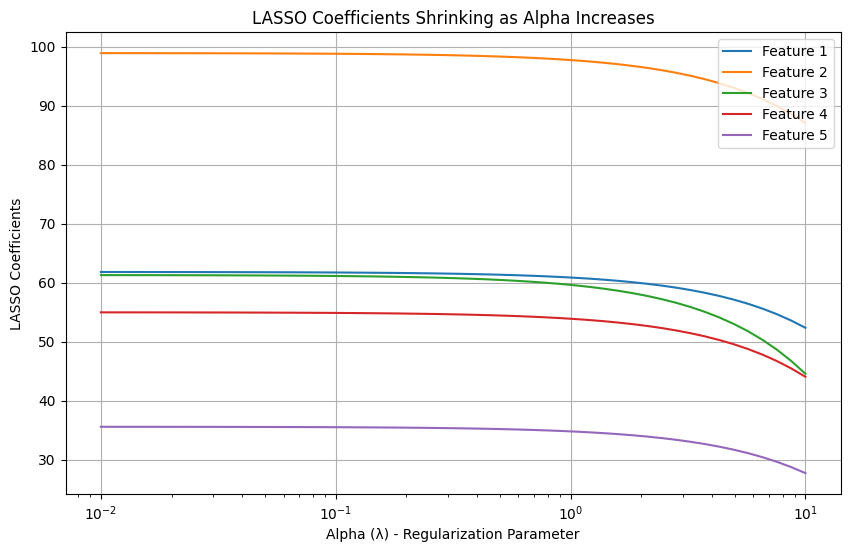

In [39]:
# Generating synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Range of alpha values (regularization strength)
alphas = np.logspace(-2, 1, 50)

# Storing coefficients for each alpha
coefficients = []

# Running LASSO for different values of alpha and storing coefficients
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X, y)
    coefficients.append(lasso.coef_)

# Convert coefficient list to an array
coefficients = np.array(coefficients)

# Plotting the coefficients as a function of alpha
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha (λ) - Regularization Parameter')
plt.ylabel('LASSO Coefficients')
plt.title('LASSO Coefficients Shrinking as Alpha Increases')
plt.legend()
plt.grid(True)
plt.show()

**Computation of K-Means Clustering: Illustrating through following Jupyter**






In [40]:
# We will Import relevent packages

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

np.random.seed(0)

%matplotlib inline

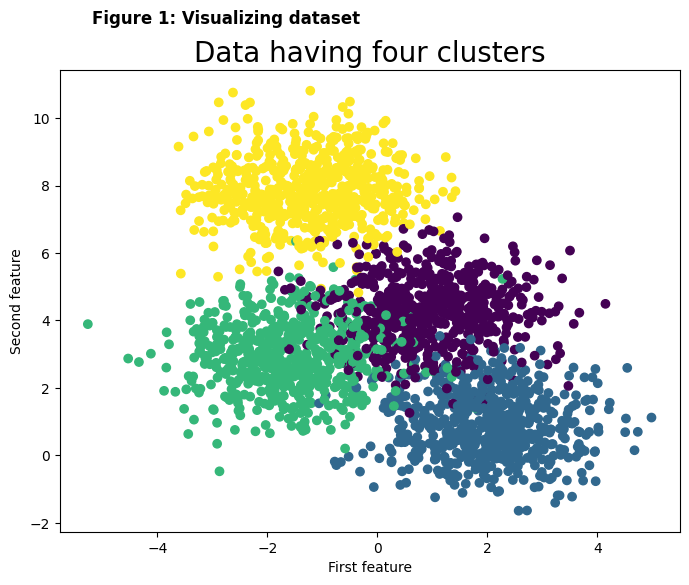

In [41]:
# Now we are generating a dataset with 4 clusters and will visualize it.

X, y = make_blobs(centers=4, n_samples=2500)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Data having four clusters", fontsize=20)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.suptitle(
    "Figure 1: Visualizing dataset", fontweight="bold", horizontalalignment="right"
)
plt.show()

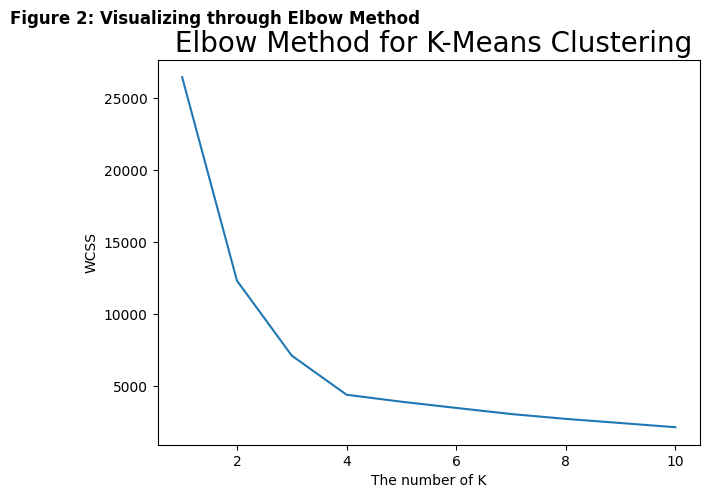

In [42]:
# Now we will plot the elbow curve.

wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title(" Elbow Method for K-Means Clustering", fontsize=20)
plt.xlabel("The number of K")
plt.ylabel("WCSS")
plt.suptitle("Figure 2: Visualizing through Elbow Method", fontweight="bold", horizontalalignment="right")
plt.show()

**Illustrating how to compute PCA using Python, visualize the results, and interpret the findings.**

### 1. Sample Data and Standardization

PCA works best with standardized data (mean = 0, standard deviation = 1), as it is sensitive to scale.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset
np.random.seed(42)
X = np.random.rand(10, 3) * 10  # 10 samples, 3 features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 2. Applying PCA

In [44]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components:")
print(pca.components_)


Explained Variance Ratio: [0.49718407 0.34194778]
Principal Components:
[[ 0.71482051 -0.66823293 -0.20614653]
 [-0.05843807 -0.35083536  0.93461197]]


## 3. Visualizing Variance Explained

We can plot how much variance each principal component explains to determine the importance of each component.

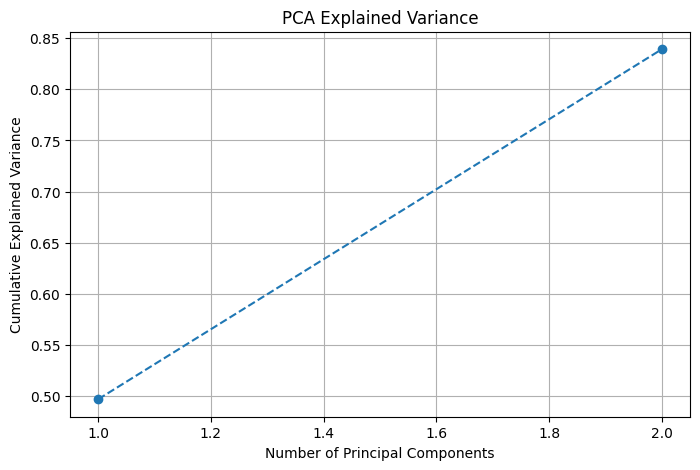

In [45]:
# Cumulative explained variance plot
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


## 4. Visualizing Data in PCA Space

Plot the transformed data in the new PCA-reduced space (2D).

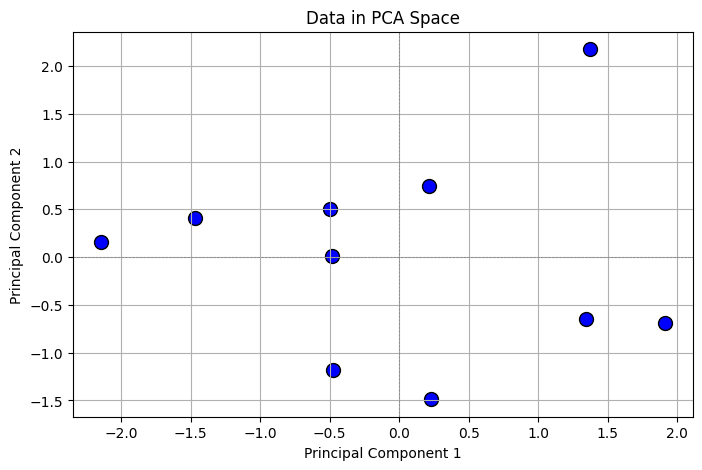

In [46]:
# PCA visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=100)
plt.title('Data in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid()
plt.show()


## 5. Reconstructing Data

You can also reconstruct the original data from the PCA-reduced representation to see how much information is retained.

In [47]:
# Reconstruct data from reduced PCA
X_reconstructed = pca.inverse_transform(X_pca)

# Compare original data and reconstruction
print("Original Data (First 5 Rows):")
print(X_scaled[:5])
print("\nReconstructed Data (First 5 Rows):")
print(X_reconstructed[:5])


Original Data (First 5 Rows):
[[-0.2326323   1.62952924  1.03975211]
 [ 0.71266246 -0.941863   -1.00425961]
 [-1.5673943   1.35598959  0.57531055]
 [ 1.17415329 -1.38008649  1.88402884]
 [ 1.69872596 -0.75962717 -0.91259679]]

Reconstructed Data (First 5 Rows):
[[-1.07462865  0.83686527  0.68955417]
 [ 1.00000302 -0.67135766 -0.8847507 ]
 [-1.54234997  1.37956658  0.58572683]
 [ 0.85436529 -1.68113818  1.75102458]
 [ 1.40539237 -1.03577441 -1.03459829]]


## 6. Heatmap of Principal Components

Visualize how the original features contribute to the principal components.

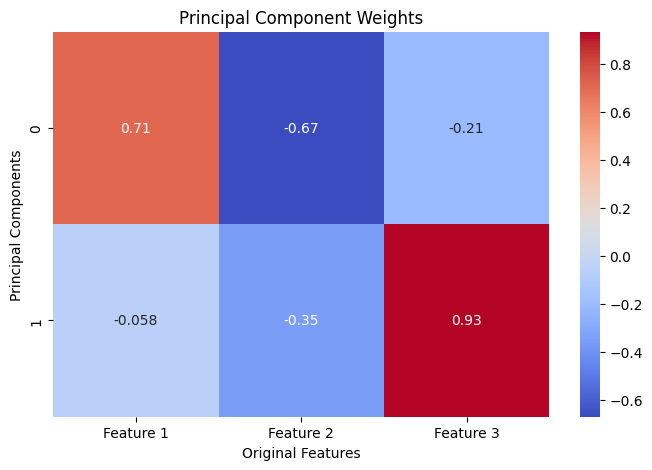

In [48]:
import seaborn as sns

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(pca.components_, columns=['Feature 1', 'Feature 2', 'Feature 3'])

plt.figure(figsize=(8, 5))
sns.heatmap(pca_df, annot=True, cmap='coolwarm', cbar=True)
plt.title('Principal Component Weights')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()


## Analysis  
Explained Variance: A variance plot tells you the number of parts that a data set gets divided into to keep only the necessary parts of the data so that most of the data content is lost. For instance, the first two main parts, if they are responsible for 95% of the variance, which means that we can conjecture on their basis.

PCA Visualization: A scatterplot in the new PCA space points out the data's new representation, mainly used to find patterns or clusters.

Feature Contributions: The heatmap illustrates the relationships between the original features and the new components. Therefore, we can draw interesting findings related to dimensionality reduction.